# House_Price_Prediction

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data File

In [2]:
data=pd.read_csv("C:\\Users\\user\\Desktop\\New folder\\house_price_data.csv")

# Data Description & Data Types

In [3]:
data.head()

,ID,date,bedrooms,bathrooms,Sqft_Area,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,price
0,7129300520,20141013T000000,3,1.00,1180,1.0,0,0,3,7,0,1955,0,98178,221900
1,6414100192,20141209T000000,3,2.25,2570,2.0,0,0,3,7,400,1951,1991,98125,538000
2,5631500400,20150225T000000,2,1.00,770,1.0,0,0,3,6,0,1933,0,98028,180000
3,2487200875,20141209T000000,4,3.00,1960,1.0,0,0,5,7,910,1965,0,98136,604000
4,1954400510,20150218T000000,3,2.00,1680,1.0,0,0,3,8,0,1987,0,98074,510000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   Sqft_Area      21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  price          21613 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 2.5+ MB


In [5]:
data.columns

Index(['ID', 'date', 'bedrooms', 'bathrooms', 'Sqft_Area', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'price'],
      dtype='object')

# Dropping Unnecessary Columns

In [6]:
data.drop(["date",'ID'],axis=1,inplace=True)

In [7]:
data.head()

,bedrooms,bathrooms,Sqft_Area,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,price
0,3,1.00,1180,1.0,0,0,3,7,0,1955,0,98178,221900
1,3,2.25,2570,2.0,0,0,3,7,400,1951,1991,98125,538000
2,2,1.00,770,1.0,0,0,3,6,0,1933,0,98028,180000
3,4,3.00,1960,1.0,0,0,5,7,910,1965,0,98136,604000
4,3,2.00,1680,1.0,0,0,3,8,0,1987,0,98074,510000


# Data Cleaning

In [8]:
data.isna().sum()

bedrooms         0
bathrooms        0
Sqft_Area        0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
price            0
dtype: int64

In [9]:
data.dtypes

bedrooms           int64
bathrooms        float64
Sqft_Area          int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
price              int64
dtype: object

# Checking Outliers and Skewness & Plotting

<Axes: xlabel='Sqft_Area'>

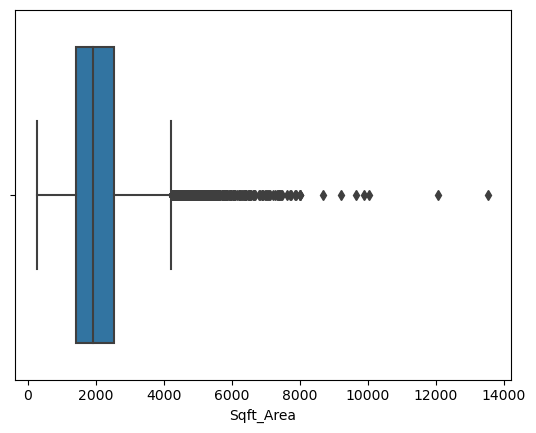

In [10]:
sns.boxplot(x=data['Sqft_Area'])

<Axes: xlabel='sqft_basement'>

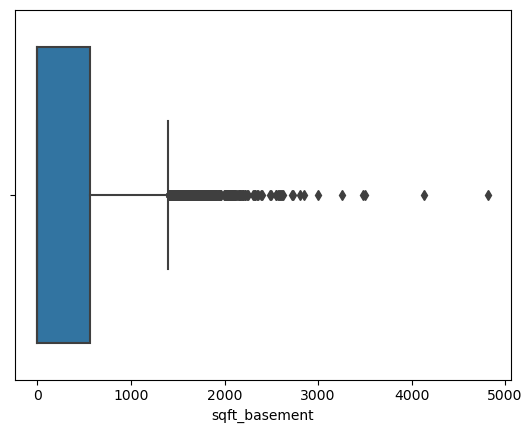

In [11]:
sns.boxplot(x=data['sqft_basement'])

<Axes: xlabel='price'>

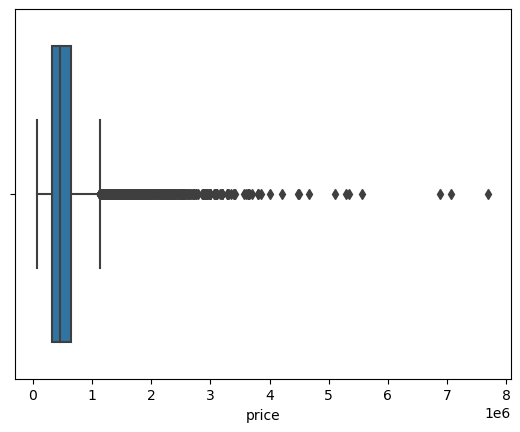

In [12]:
sns.boxplot(x=data['price'])

<Axes: xlabel='bathrooms'>

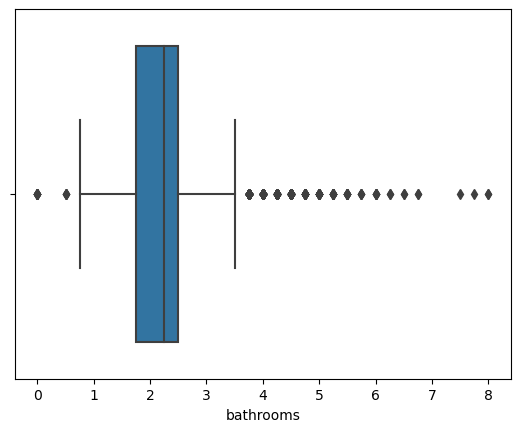

In [15]:
sns.boxplot(x=data["bathrooms"])

In [ ]:
sns.boxplot(x=data["yr_renovated"])

In [17]:
data['price'].skew()

4.024069144684712

In [18]:
data['Sqft_Area'].skew()

1.471555426802092

In [19]:
data['sqft_basement'].skew()

1.5779650555996247

In [ ]:
Q1=data['price'].quantile(0.25)
Q2=data['price'].quantile(0.5)
Q3=data['price'].quantile(0.75)

IQR = Q3-Q1

UL = Q3+(1.5*IQR)
LL = Q1-(1.5*IQR)

data[(data['price']>UL) | (data['price']<LL)]

In [ ]:
Q1=data['Sqft_Area'].quantile(0.25)
Q2=data['Sqft_Area'].quantile(0.5)
Q3=data['Sqft_Area'].quantile(0.75)

IQR = Q3-Q1

UL = Q3+(1.5*IQR)
LL = Q1-(1.5*IQR)

data[(data['Sqft_Area']>UL) | (data['Sqft_Area']<LL)]

In [ ]:
Q1=data['sqft_basement'].quantile(0.25)
Q2=data['sqft_basement'].quantile(0.5)
Q3=data['sqft_basement'].quantile(0.75)

IQR = Q3-Q1

UL = Q3+(1.5*IQR)
LL = Q1-(1.5*IQR)

data[(data['sqft_basement']>UL) | (data['sqft_basement']<LL)]

In [ ]:
Q1=data['bathrooms'].quantile(0.25)
Q2=data['bathrooms'].quantile(0.5)
Q3=data['bathrooms'].quantile(0.75)

IQR = Q3-Q1

UL = Q3+(1.5*IQR)
LL = Q1-(1.5*IQR)

data[(data['bathrooms']>UL) | (data['bathrooms']<LL)]

# Outliers Treatment

In [ ]:
data=data[(data['price']<UL) | (data['price']>LL)]

In [ ]:
data=data[(data['Sqft_Area']<UL) | (data['Sqft_Area']>LL)]

In [ ]:
data=data[(data['sqft_basement']<UL) | (data['sqft_basement']>LL)]

In [ ]:
data=data[(data['bathrooms']<UL) | (data['pri']>LL)]

# Data Spliting

In [20]:
import sklearn

In [21]:
x=data.drop(["price"],axis=1)
y=data.price

# Data Transformation

In [22]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [23]:
sc=StandardScaler()

In [24]:
x=sc.fit_transform(x)

In [25]:
x

array([[-0.39873715, -1.44746357, -0.97983502, ..., -0.54489777,
        -0.21012839,  1.87015159],
       [-0.39873715,  0.1756067 ,  0.53363434, ..., -0.6810785 ,
         4.7466776 ,  0.87956753],
       [-1.47395936, -1.44746357, -1.42625404, ..., -1.29389179,
        -0.21012839, -0.9333882 ],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, ...,  1.29354209,
        -0.21012839,  1.23468257],
       [-0.39873715,  0.50022075, -0.52252773, ...,  1.12331618,
        -0.21012839, -0.95207846],
       [-1.47395936, -1.77207762, -1.15404732, ...,  1.25949691,
        -0.21012839,  1.23468257]])

In [26]:
x[1:5]

array([[-0.39873715,  0.1756067 ,  0.53363434,  0.93650577, -0.08717263,
        -0.30575946, -0.62918687, -0.55883575,  0.2451414 , -0.6810785 ,
         4.7466776 ,  0.87956753],
       [-1.47395936, -1.44746357, -1.42625404, -0.915427  , -0.08717263,
        -0.30575946, -0.62918687, -1.40958711, -0.65868104, -1.29389179,
        -0.21012839, -0.9333882 ],
       [ 0.67648506,  1.14944885, -0.13055006, -0.915427  , -0.08717263,
        -0.30575946,  2.44429394, -0.55883575,  1.39751501, -0.20444594,
        -0.21012839,  1.08516045],
       [-0.39873715, -0.14900736, -0.43542158, -0.915427  , -0.08717263,
        -0.30575946, -0.62918687,  0.29191561, -0.65868104,  0.54454807,
        -0.21012839, -0.073636  ]])

# Train Test Splitting

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=42)

In [29]:
x_train.shape

(17290, 12)

In [30]:
x_test.shape

(4323, 12)

In [31]:
y_train.shape

(17290,)

In [32]:
y_test.shape

(4323,)

# Import Model

# LINEAR REGRESSION

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,classification_report,confusion_matrix
model=LinearRegression()

#creating linear regression model
model.fit(x_train,y_train)

#predicting on train and test data
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

#Evaluation
r2_train=r2_score(y_train,y_pred_train)
r2_test=r2_score(y_test,y_pred_test)
print('Train r2 score:',r2_train)
print('Test r2 Score:',r2_test)


Train r2 score: 0.6512853233496806
Test r2 Score: 0.6516167705437788


# DECISION TREE REGRESSOR

In [34]:
from sklearn.tree import DecisionTreeRegressor

# Create a DecisionTreeRegressor object
regressor = DecisionTreeRegressor(random_state=42,max_depth=5)

# Fit the model to the training data
regressor.fit(x_train, y_train)

# Predicting on test data
y_pred_train=regressor.predict(x_train)
y_pred_test = regressor.predict(x_test)

#Evaluation
r2_train=r2_score(y_train,y_pred_train)
r2_test=r2_score(y_test,y_pred_test)
print('Train r2 Score:',r2_train)
print('Test r2 Score:',r2_test)


Train r2 Score: 0.675861496662884
Test r2 Score: 0.6111207499371318


# RANDOM FOREST ALGORITHM

In [35]:
from sklearn.ensemble import RandomForestRegressor

# Creating Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=5)

# Training the Random Forest Regressor model
rf_model.fit(x_train, y_train)

# Predicting on test data
y_pred_train=rf_model.predict(x_train)
y_pred_test =rf_model.predict(x_test)

#Evaluation
r2_train=r2_score(y_train,y_pred_train)
r2_test=r2_score(y_test,y_pred_test)
print('Train r2 Score:',r2_train)
print('Test r2 Score:',r2_test)



Train r2 Score: 0.7195662970501969
Test r2 Score: 0.6563589624246391


# XGBOOST

In [37]:
!pip install xgboost
import xgboost as xgb

# Creating XGBoost Regressor model
xgb_model = xgb.XGBRegressor(n_estimators = 13,random_state=42)
        
# Training the XGBoost Regressor model
xgb_model.fit(x_train, y_train)

# Predicting on test data
y_pred_train = xgb_model.predict(x_train)
y_pred_test = xgb_model.predict(x_test)

#Evaluation
r2_train=r2_score(y_train,y_pred_train)
r2_test=r2_score(y_test,y_pred_test)
print('Train r2 Score:',r2_train)
print('Test r2 Score:',r2_test)


Train r2 Score: 0.8718798106676593
Test r2 Score: 0.7542620555315016
